2 Part II : Practical application

2.1 K-means clustering

we generate the data

In [1]:
import numpy as np
X = np.random.randn(50,2)
X[ 0 : 25 ,0 ] = X[ 0:25,0]+3
X[ 0 : 25,1 ] = X[ 0:25,1]-4

We plot the data to observe the two separated clusters.

Text(0, 0.5, 'X2')

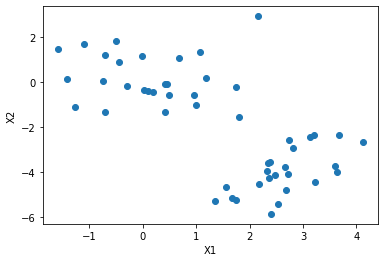

In [2]:
import matplotlib.pyplot as plt
plt. plot(X[:,0] , X[:,1],"o")
plt. xlabel( "X1")
plt.ylabel("X2")


As we can see, the data is clearly divided in two parts and in clustering methods we want to create groups of data that share features ranges, so to improve it, this data is really demostrative.

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 2 , random_state = 100).fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 2.64550912 -4.00145188]
 [ 0.14732432  0.1908576 ]]


We can see that as well as we improve the algorithm, we specified to the Kmeans function that we want to clusters, and we have it, the first group of data we can see in the graphic is classified in group 1, since the other one is classified in group 2.

Text(0, 0.5, 'X2')

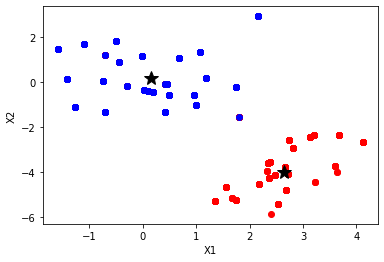

In [4]:
for i in range (0,X.shape[0]) :
    if kmeans.labels_[i] == 0 :
        plt.plot(X[i:,0],X[i:,1], "o ", color= "red")
    else:
        plt.plot(X[i:,0],X[i:,1],"o" , color= "blue")
        centroid1=kmeans.cluster_centers_[0]
centroid2=kmeans.cluster_centers_[1]
plt.plot(centroid1[0],centroid1[1], "*" , color= "black" ,markersize=15)
plt.plot(centroid2[0],centroid2[1] , "*"  , color= "black", markersize = 15)
plt.xlabel("X1")
plt.ylabel("X2")

We can see that the K-means algoithm has separate the data in two categories asigning two centroids and asigning the data to the closest centroid. At the end we have the good classification and with the function cluster_centers_ we can plot the centroids too.

(c) [graded question] Now, you are going to perform K−means with real data. The file Live 20210128.csv
contains statistics about Facebook pages of 10 Thai fashion and cosmetics retail sellers. Each
observation represents a post of different nature (video, photo, status or link). The features
are variables describing each post such as the date, the number of reactions (num reactions),
number of comments (num comments), number of likes (num likes), etc. Import the data set
and get familiar with the data. After dropping the last 4 columns (empty)which, answer the
following questions : how many observations are there ? How many variables are there ? You
will denote the resulting dataframe object Live.


In [5]:
import pandas
Live = pandas.read_csv( "Live 20210128.csv",index_col = 0)
print(Live)
print(Live.count())

          status_type status_published  num_reactions  num_comments  \
status_id                                                             
1               video   4/22/2018 6:00            529           512   
2               photo  4/21/2018 22:45            150             0   
3               video   4/21/2018 6:17            227           236   
4               photo   4/21/2018 2:29            111             0   
5               photo   4/18/2018 3:22            213             0   
...               ...              ...            ...           ...   
7046            photo   9/24/2016 2:58             89             0   
7047            photo  9/23/2016 11:19             16             0   
7048            photo  9/21/2016 23:03              2             0   
7049            photo   9/20/2016 0:43            351            12   
7050            photo  9/10/2016 10:30             17             0   

           num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  

The possible predictors we have in this data are the status type (video,photo...type of content), the status published (the data of publication with the hour precised), number of reactions, number of comments, number of shares, number of likes, number of loves, number of hahas, number of sads, number of angrys.
We have 7050 observations and 15 columns of type of data but 4 without any observation.

The means for comments, reactions and likes are very large, the number of loves still a big number compare to others. The shares too, and the especific reactions are in the most part less or almost equal than 1.

All the minimum values are 0 and the max for the first 4 columns are between 3424 to 20990 and for the others between 31 and 657.
The std is really big for some observations and are proportional to the min and the max values, but still being larges proportions.

(d) [graded question] Perform descriptive statistics with the dataset and comment the results. Do
you think is it suitable to scale the data before performing clustering analysis ? Justify your
answers.


In [6]:
Live.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


I don´t think it can be possible since the minimum values are 0 for some and like std is really big and means are really differents. The maximum number of comments (who is the biggest number int the statistics is 20990 who is not that big, and even we are going to have values as 1 or 2 so they will be very little if we scale this values.

(e) [graded question] In the following you are going to perform clustering analysis using only 5
features of the Live dataset., that is, num reactions, num comments, num shares, num likes
and num loves prepare this dataset and scale the data. You will denote the scaled dataset
Live_scaled. You can use the following commands :

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
f1 = Live["num_reactions"]
f2= Live["num_comments"]
f3=Live["num_likes"]
f4=Live["num_shares"]
f5=Live["num_loves"]
dataCluster=pandas.concat([f1,f2,f3,f4,f5],axis=1)
print(dataCluster)
print(scaler.fit(dataCluster))
print(scaler.mean_)
Live_scaled = scaler.transform(dataCluster)


           num_reactions  num_comments  num_likes  num_shares  num_loves
status_id                                                               
1                    529           512        432         262         92
2                    150             0        150           0          0
3                    227           236        204          57         21
4                    111             0        111           0          0
5                    213             0        204           0          9
...                  ...           ...        ...         ...        ...
7046                  89             0         89           0          0
7047                  16             0         14           0          1
7048                   2             0          1           0          1
7049                 351            12        349          22          2
7050                  17             0         17           0          0

[7050 rows x 5 columns]
StandardScaler()
[230.1171

In [8]:
print(len(Live_scaled))
print(Live_scaled)

7050
[[ 0.64610394  0.32335035  0.48272661  1.6868788   1.98326643]
 [-0.17319166 -0.25220622 -0.14472021 -0.3041444  -0.3184544 ]
 [-0.00673846  0.01308938 -0.02457082  0.12901714  0.2069384 ]
 ...
 [-0.49312768 -0.25220622 -0.47624353 -0.3041444  -0.29343569]
 [ 0.26131603 -0.23871662  0.29805255 -0.13695924 -0.26841699]
 [-0.46070173 -0.25220622 -0.44064371 -0.3041444  -0.3184544 ]]


We can see that the function takes the mean of all the data and fit a scale for it. We can see in the new values that, for exemple, now the num of loves of the first observation that was 92 is 1.98 and the num of reactions was 529 and now is 0.64, so it seems like for the scaled values the num of reactions is low than the number of loves what is not true, but it can works because the relation between the elements still being the same for each feature.

(f) [graded question] The purpose of this study is to get clusters of posts based on people’s reactions
on Facebook. Perform K-means clustering with K = 4 considering. Use the following code with
the given values of the parameters n init and randomstate.


In [9]:
from sklearn.cluster import KMeans
Live_Kmeans4=KMeans(n_clusters=4,n_init=50,random_state =1000).fit(Live_scaled)
Live_Kmeans4_labels=Live_Kmeans4.labels_

#print(Live_Kmeans4)
print(Live_Kmeans4_labels)

[2 0 0 ... 0 0 0]


In [10]:
pandas.crosstab(index=Live.status_type,
    columns = Live_Kmeans4_labels,
    rownames = [ "Real groups" ] ,
    colnames = [ "K−means clusters" ] )


K−means clusters,0,1,2,3
Real groups,,,,
link,49,14,0,0
photo,4063,221,3,1
status,287,78,0,0
video,1516,77,625,116


7050
precision and recall:
0.05475177304964539
F1-score
0.054


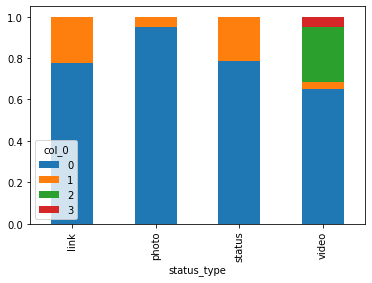

In [11]:
pandas.crosstab(Live.status_type, Live_Kmeans4_labels, normalize='index').plot.bar(stacked=True)
print((49+14+3+1+221+4063+287+78+1516+77+625+116))
print("precision and recall:")
print((49+221+116)/7050)
print("F1-score")
print(2*(0.054*0.054)/(0.054+0.054))


We can see that the precision and recall are the same, since all the observations are in a cluster, but is almost 5% of precision and recall, what is not much at all. The algorithm is not performing as well, there are classifications that are not matching in the good cluster, so we can try with another K.

(g) [graded question] Now you are going to use the elbow method to choose the optimal number of
clusters. Run the following code to calculate the within cluster variation for number of clusters
ranging from 1 to 15. Make a plot and choose the best number of clusters. Justify your answer.

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]
[3 0 0 ... 0 0 0]
[0 4 0 ... 4 0 4]
[9 0 6 ... 0 6 0]
[8 0 7 ... 0 7 0]
[8 0 5 ... 0 5 0]
[5 0 5 ... 0 9 0]
[0 3 3 ... 8 3 8]
[8645017895.809654, 4985737810.292088, 2734643659.690309, 2000353100.6684291, 1469304661.9018958, 1186304640.1103272, 922780784.3561394, 749468879.4863222, 620936364.9445505, 522733280.1430479, 449720769.02283627, 378533789.540377, 328842257.2426571, 295910057.29857004]


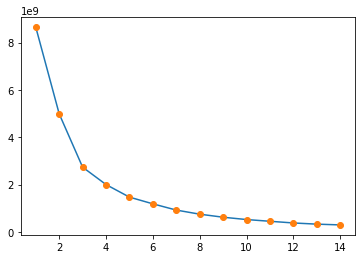

In [12]:
distortions= []
K=range( 1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k ,n_init=50, random_state =1000)
    a = kmeanModel.fit(dataCluster)
    print(a.labels_)
    distortions.append(kmeanModel.inertia_)
    
print(distortions)
plt.plot(K,distortions, "-")
plt.plot(K,distortions, "o")

plt.show()


In [13]:
!pip install yellowbrick

You should consider upgrading via the '/Users/matiasmendez/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


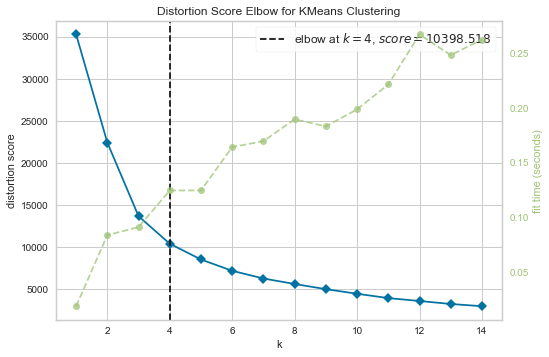

In [14]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(Live_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

The best number of clusters is 4 because is the inflection point in the graphic and we know that in Elbow method The WCV is a measure of compactness of the cluster. Also, we can observe that after the k=4 the rest of the greater values for K have a very similar behavior to K=4, so it could be infered that K=4 is the appropriate number of clusters to have a clear distinct behavior among the groups of data, without the need of having a greater K value than 4 (because is better for the business to have the least amount of groups possible as long as there is a clear distinction among the data groups ).


(h) [graded question] Perform K-meand with the chosen value of K in the previous question,
calculate the matching matrix and interpret the results.

In [15]:
kmeanModel_3c = KMeans(n_clusters=3 ,n_init=50, random_state =1000)
ic_result = kmeanModel_3c.fit(Live_scaled)
print(ic_result.labels_)
    
print(pandas.crosstab(index=Live.status_type,
    columns = ic_result.labels_,
    rownames = [ "Real groups" ] ,
    colnames = [ "K−means clusters" ] ) )

    
print(pandas.crosstab(index=ic_result.labels_,
    columns = Live.status_type,
    rownames = [ "Real groups" ] ,
    colnames = [ "K−means clusters" ] ) )

print(7050-(49+14+4075+2+211+295+70+76+342+1916))
print("precision:")
print((49+2+70)/7050)
print("recall:")
print((49+2+70+342)/7050)



[0 0 0 ... 0 0 0]
K−means clusters     0    1    2
Real groups                     
link                49    0   14
photo             4075    2  211
status             295    0   70
video             1916  342   76
K−means clusters  link  photo  status  video
Real groups                                 
0                   49   4075     295   1916
1                    0      2       0    342
2                   14    211      70     76
0
precision:
0.017163120567375886
recall:
0.06567375886524823


Here, we have tried with 3 to see if it could improve something about the precision and recall and in fact, we improve the recall for a little, but the precision is totally worst, so the k = 4 really works better, but works very bad anyways.

2.2 Hierarchical clustering


In [16]:
from scipy.cluster.hierarchy import linkage
hc_complete=linkage(X, "complete")

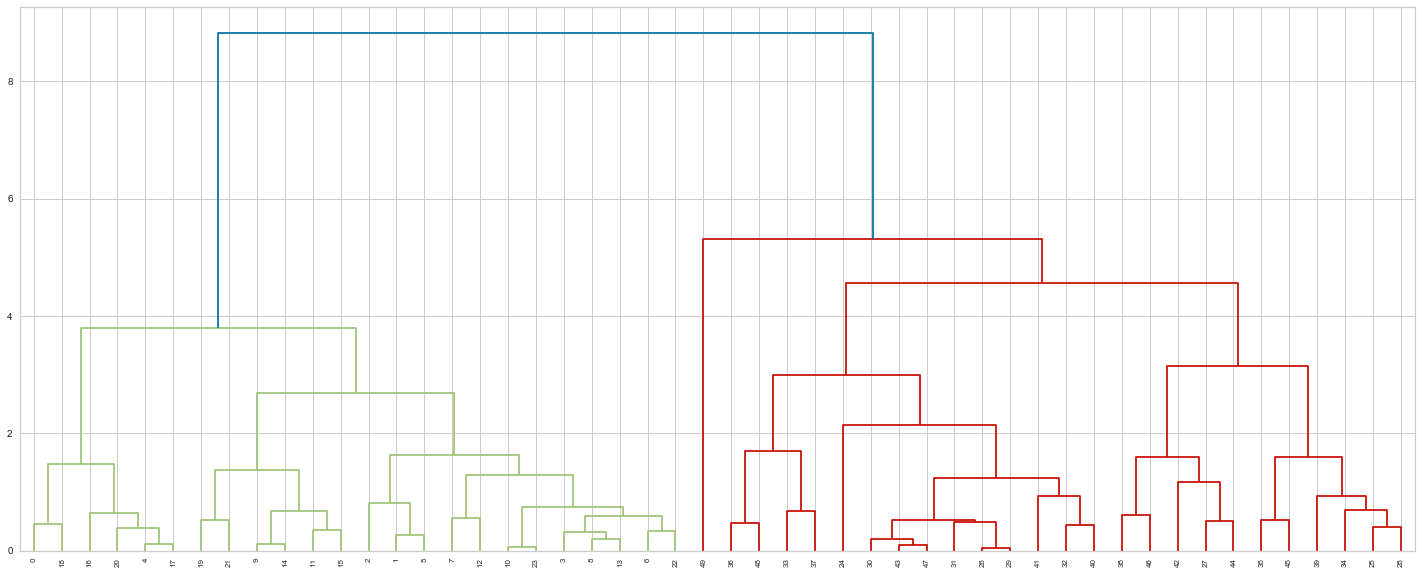

In [17]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize =(25,10))
dendrogram(hc_complete)
plt.show()

In [18]:
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(hc_complete,n_clusters=2).T)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


(a) [graded question] Perform hierarchical clustering using the Live_scaled data using complete
linkage. To begin you will cut the dendrogram at 4 clusters. Similarly to the previous section,
calculate the matching matrix and comment the results.


[[0 0 0 ... 0 0 0]]
[[2.30000000e+01 1.71100000e+03 0.00000000e+00 2.00000000e+00]
 [4.14000000e+02 1.02300000e+03 0.00000000e+00 2.00000000e+00]
 [6.17700000e+03 6.22800000e+03 0.00000000e+00 2.00000000e+00]
 ...
 [1.40930000e+04 1.40950000e+04 2.30843652e+01 7.04600000e+03]
 [1.40810000e+04 1.40960000e+04 2.81291435e+01 7.04900000e+03]
 [4.54300000e+03 1.40970000e+04 3.38221014e+01 7.05000000e+03]]
Hierarchy clusters     0  1   2  3
Real groups                       
link                  63  0   0  0
photo               4288  0   0  0
status               365  0   0  0
video               2264  3  66  1


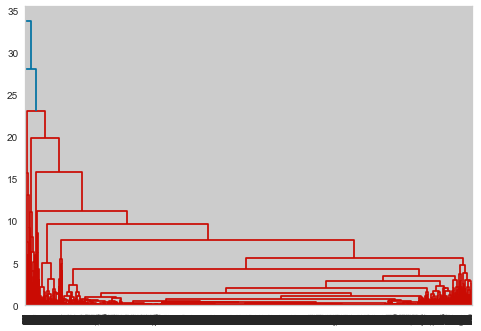

In [19]:
hc_complete_live=linkage(Live_scaled, "complete")
print(cut_tree(hc_complete_live,n_clusters=4).T )
print(hc_complete_live)
print(pandas.crosstab(index=Live.status_type,
    columns = cut_tree(hc_complete_live,n_clusters=4).T[0] ,
    rownames = [ "Real groups" ] ,
    colnames = [ "Hierarchy clusters" ] ))
dendrogram(hc_complete_live)
plt.show()

(b) [graded question] Now you will plot the dendrogram using the parameter truncate_mode =
’lastp’ and p=15. According to the dendrogram at which level (number of clusters) is suitable
to cut the dendrogram ? Why ?


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [105.0, 105.0, 130.0, 130.0],
  [82.5, 82.5, 117.5, 117.5],
  [41.25, 41.25, 100.0, 100.0],
  [15.0, 15.0, 70.625, 70.625],
  [5.0, 5.0, 42.8125, 42.8125]],
 'dcoord': [[0.0, 12.019600428232053, 12.019600428232053, 0.0],
  [0.0, 9.143481821271312, 9.143481821271312, 0.0],
  [0.0, 13.063404793640688, 13.063404793640688, 9.143481821271312],
  [12.019600428232053,
   15.688028043044397,
   15.688028043044397,
   13.063404793640688],
  [0.0, 8.15275470136014, 8.15275470136014, 0.0],
  [0.0, 11.1133080195882, 11.1133080195882, 8.15275470136014],
  [0.0, 8.609886412797923, 8.609886412797923, 0.0],
  [0.0, 9.646234912864417, 9.646234912864417, 0.0],
  [8.609886412797923,
   11.207589113100708,
   11.207589113100708,
   9.

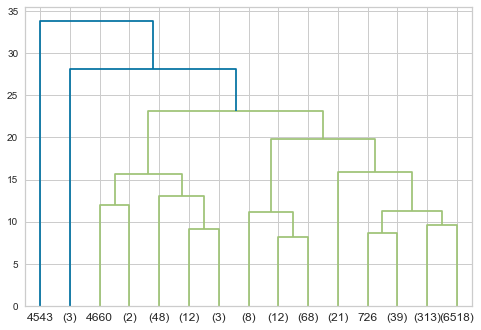

In [20]:
dendrogram(hc_complete_live,  truncate_mode="lastp", p=15)
  

I think the better decision is tu cut the denogram when there are 3 clusters because after this 3 top clusters, the little clusters inside the green one cluster are not functional because at the end the first green leave has 4660 data inside and the others just a little part of the data.

(c) [graded question] Perform clustering evaluation by calculating the Silhouette coefficient and
Davies-Bouldin index for K-means clustering and Hierarchical clustering for K = 6. Use the
functions silhouette_score and davies_bouldin_score from the metrics library. Compare
and conclude.

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from sklearn.metrics import silhouette_score, davies_bouldin_score


model1 = KMeans(n_clusters=4)
preds = model1.fit_predict(dataCluster)
centers = model1.cluster_centers_
#visualizer1 = SilhouetteVisualizer(model1, colors='yellowbrick')

#visualizer1.fit(Live_scaled)        # Fit the data to the visualizer
#visualizer1.show()        # Finalize and render the figure
print( "Silhoutte ",silhouette_score(dataCluster, preds))
print( "davies_bouldin_score ",davies_bouldin_score(dataCluster, preds))


Silhoutte  0.817586369396667
davies_bouldin_score  0.616874579254357


In [27]:

from sklearn.metrics import silhouette_score, davies_bouldin_score
#score = silhouette_score(df, preds)


model2 = linkage(Live_scaled,"complete")
model2_cut = cut_tree(model2,n_clusters=6)
score_sil = silhouette_score(dataCluster, model2_cut)
score_davis = davies_bouldin_score(dataCluster, model2_cut)

#visualizer2 = SilhouetteVisualizer(model2_cut, colors='yellowbrick')

#visualizer1.fit(Live_scaled)        # Fit the data to the visualizer
#visualizer2.show()        # Finalize and render the figure
print("Silhoutte score ",score_sil)
print("davies_bouldin_score score ",score_davis)

/Users/matiasmendez/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhoutte score  0.7953265971016983
davies_bouldin_score score  0.7334024387109407


/Users/matiasmendez/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
